In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt



In [3]:
# Step 1: Load the MNIST Dataset
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert images to PyTorch tensors
    transforms.Normalize((0.5,), (0.5,))  # Normalize the images
])

#train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
#test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)




In [5]:
import torch.nn.functional as F 

In [6]:
# Step 2: Define the CNN Model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(64 * 3 * 3, 128)  # Assuming input size 28x28, 3 pooling layers reduce it to 3x3
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 64 * 3 * 3)  # Flatten the output from the conv layers
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x



In [7]:
model = CNN()



In [8]:
# Step 3: Define Loss Function and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)



In [9]:
# Step 4: Train the Model
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, (images, labels) in enumerate(train_loader):
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {running_loss/100:.4f}')
            running_loss = 0.0



Epoch [1/5], Step [100/938], Loss: 1.0070
Epoch [1/5], Step [200/938], Loss: 0.2277
Epoch [1/5], Step [300/938], Loss: 0.1529
Epoch [1/5], Step [400/938], Loss: 0.1138
Epoch [1/5], Step [500/938], Loss: 0.1133
Epoch [1/5], Step [600/938], Loss: 0.0998
Epoch [1/5], Step [700/938], Loss: 0.0779
Epoch [1/5], Step [800/938], Loss: 0.0866
Epoch [1/5], Step [900/938], Loss: 0.0798
Epoch [2/5], Step [100/938], Loss: 0.0604
Epoch [2/5], Step [200/938], Loss: 0.0627
Epoch [2/5], Step [300/938], Loss: 0.0576
Epoch [2/5], Step [400/938], Loss: 0.0521
Epoch [2/5], Step [500/938], Loss: 0.0633
Epoch [2/5], Step [600/938], Loss: 0.0466
Epoch [2/5], Step [700/938], Loss: 0.0479
Epoch [2/5], Step [800/938], Loss: 0.0486
Epoch [2/5], Step [900/938], Loss: 0.0474
Epoch [3/5], Step [100/938], Loss: 0.0444
Epoch [3/5], Step [200/938], Loss: 0.0311
Epoch [3/5], Step [300/938], Loss: 0.0439
Epoch [3/5], Step [400/938], Loss: 0.0380
Epoch [3/5], Step [500/938], Loss: 0.0372
Epoch [3/5], Step [600/938], Loss:

In [10]:
# Step 5: Evaluate the Model
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f'Accuracy of the model on the 10,000 test images: {100 * correct / total:.2f}%')



Accuracy of the model on the 10,000 test images: 99.14%


C:\Users\Joy Biswas\AppData\Local\Temp\ipykernel_18744\2717588634.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


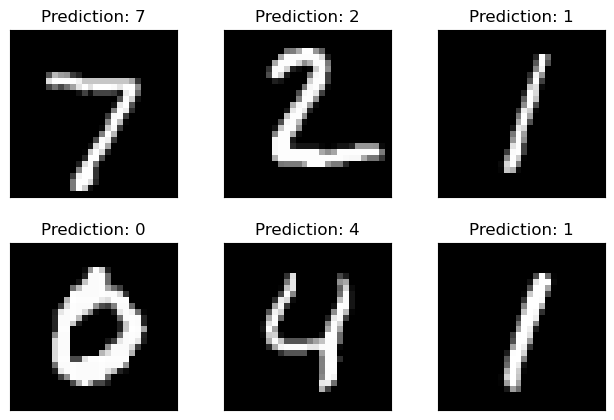

In [11]:
# Visualize some test results
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

with torch.no_grad():
    output = model(example_data)

fig = plt.figure()
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    plt.title(f'Prediction: {output.data.max(1, keepdim=True)[1][i].item()}')
    plt.xticks([])
    plt.yticks([])
plt.show()